# 1. 라이브러리 import 

- numpy, pyplot, pandas, statsmodels 를 입력합니다.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels import api

%matplotlib inline

# 2. 분석할 데이터 가져오기

- statsmodels 에서 제공하는 데이터를 이용했습니다.


- 데이터는 "Income and food expenditure for 235 working class households in 1857 Begium"입니다.


- 데이터프레임에서 볼 수 있듯이 컬럼으로 소득(income)과 식료품지출(foodexp)이 있습니다.



In [32]:
df = api.datasets.engel.load_pandas().data

In [37]:
df.head(10)

,income,foodexp
0,420.157651,255.839425
1,541.411707,310.958667
2,901.157457,485.680014
3,639.080229,402.997356
4,750.875606,495.560775
5,945.798931,633.797815
6,829.397887,630.756568
7,979.164836,700.440904
8,1309.878940,830.958622
9,1492.398744,815.360217


- 식료품지출과 소득 대비 식료품지출(foodexp/income)의 관계를 알아보겠습니다.


- 이를 위해 먼저 'food/income' 컬럼을 만들고 값을 계산해 넣어줍니다.



In [40]:
df['food/income'] = df['foodexp'] / df['income']
df = df.drop(df.loc[df['income'] > 4000].index)

In [41]:
df.head(10)

,income,foodexp,food/income
0,420.157651,255.839425,0.608913
1,541.411707,310.958667,0.574348
2,901.157457,485.680014,0.538951
3,639.080229,402.997356,0.630590
4,750.875606,495.560775,0.659977
5,945.798931,633.797815,0.670119
6,829.397887,630.756568,0.760499
7,979.164836,700.440904,0.715345
8,1309.878940,830.958622,0.634378
9,1492.398744,815.360217,0.546342




- 그래프를 그릴 때 편리하게 하기 위하여 '소득' 컬럼을 기준으로 정렬합니다.



In [12]:
df = df.sort_values(by = 'income')
df = df.reset_index(drop = True)

# 3. 그래프

- pyplot을 이용하여 '소득 대비 식료품지출'과 '소득' 간의 관계를 그래프로 나타냅니다.


- 그 결과 소득이 높을수록 소득에서 식료품 지출이 차지하는 비율이 낮아진다는 것을 알 수 있습니다.


- 'food/income'과 'income'은 음의 상관관계를 보입니다.



Text(0, 0.5, 'Annual household food expenditure')

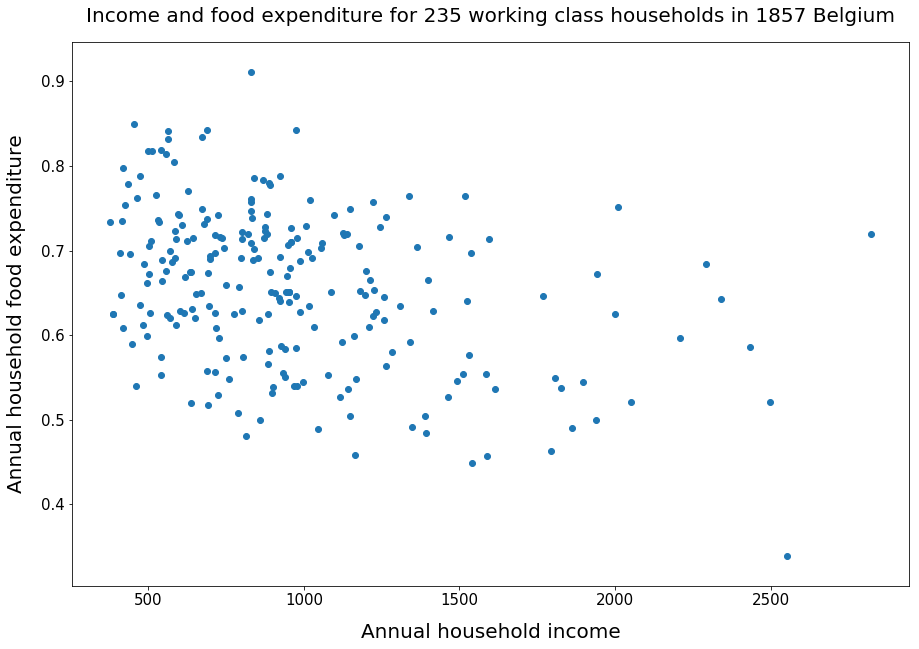

In [13]:
plt.figure(figsize = (15, 10))
plt.scatter(df['income'], df['food/income'])
plt.title('Income and food expenditure for 235 working class households in 1857 Belgium', fontsize = 20, pad = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Annual household income', fontsize = 20, labelpad = 15)
plt.ylabel('Annual household food expenditure', fontsize = 20, labelpad = 15)

# 4. 선형회귀분석

- 선형회귀분석을 하기 위해 데이터를 준비합니다.


- 'income' 컬럼을 독립변수로 하고, 'food/income' 컬럼을 종속변수로 설정합니다.


- statsmodels.api.add_constant() 메소드를 사용해 'y 절편'을 추가합니다.



In [42]:
x = api.add_constant(df['income'].values)
y = df['food/income'].values
res = api.OLS(y, x).fit()

- 아래의 결과를 해석하면 다음과 같습니다.


- const coef와 x1 coef는 각각 표본회귀식 Y_i = a + b X_i + e_i의 a와 b를 의미합니다.


- 그리고 그 값은 결과에서 볼 수 있듯이 각각 0.7303, -7.595e-05 입니다. 즉 Y_i = 0.7303 + (-7.595e-05)X_i + e_i 로 표현이 가능합니다.


- 한편 이 계수들은 p-value 로 미루어 보아 모두 통계적으로 유의미합니다.


- 그러나 결정계수 R^2 값이 낮은 것으로 볼 때, 회귀식의 설명력은 약한 것으로 판단됩니다.


- 이는 아래의 그래프에서 회귀선을 중심으로 데이터가 멀리 퍼져있는 모습에서 확인할 수 있습니다.



In [15]:
display(res.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     37.22
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           4.39e-09
Time:                        12:53:22   Log-Likelihood:                 244.31
No. Observations:                 234   AIC:                            -484.6
Df Residuals:                     232   BIC:                            -477.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7303      0.013     55.090      0.000       0.704       0.756
x1         -7.595e-05   1.24e-05     -6.101      0.000      -0.000   -5.14e-05
==============================================================================
Omnibus:                        2.637   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.268   Jarque-Bera (JB):                1.984
Skew:                          -0.035   Prob(JB):                        0.371
Kurtosis:                       2.554   Cond. No.                     2.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



- 아래 그래프를 보면 위에서 설명한 바와 같이 회귀선을 중심으로 데이터가 멀리 퍼져있습니다.


- 이러한 이유 때문에 R^2 값이 낮게 나온 것이라고 해석할 수 있습니다.


- 다른 말로 하면 잔차(residual)이 크다고 할 수 있습니다.



Text(0, 0.5, 'Annual food expenditure/income ratio')

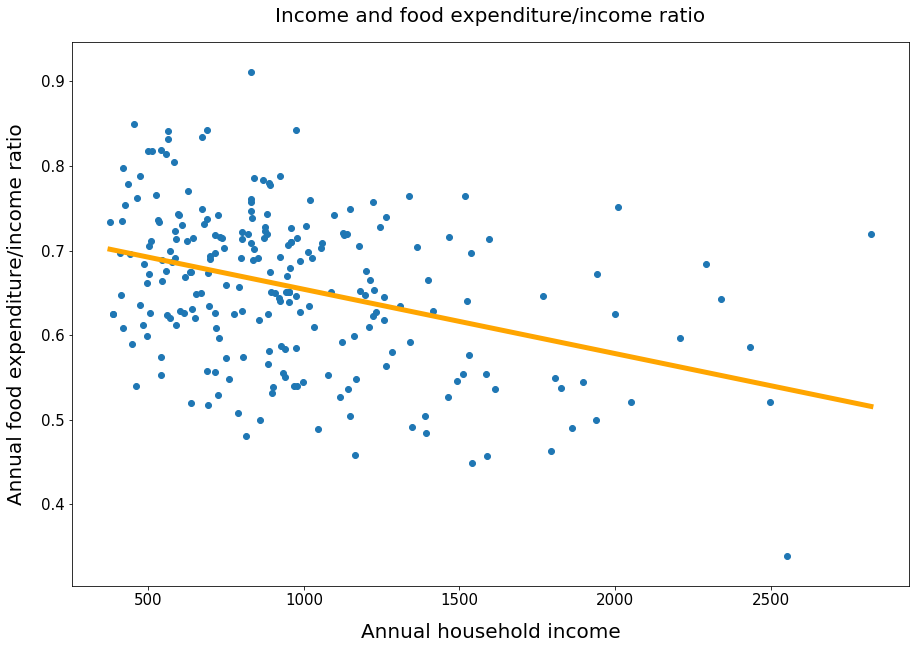

In [16]:
plt.figure(figsize = (15, 10))
plt.scatter(df['income'], df['food/income'])
plt.plot(df['income'], df['income'] * (-7.595e-05) + 0.7303, color = 'orange', linewidth = 5)
plt.title('Income and food expenditure/income ratio', fontsize = 20, pad = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Annual household income', fontsize = 20, labelpad = 15)
plt.ylabel('Annual food expenditure/income ratio', fontsize = 20, labelpad = 15)



- 아래는 이해를 돕기 위해 종속변수(income 컬럼)의 값을 도출한 회귀선을 이용해 역으로 계산한 표입니다.


- 즉 표본회귀선은 Y = a + b X 을 나타낸다고 할 때, a와 b에 각 계수를, X에 독립변수의 값(income 컬럼)을 대입합니다.


- 이 값에 잔차 e_i를 더하면 각각의 food/income 값을 계산할 수 있습니다. 그리고 이 값들은 위 그래프의 파란색 점에 대응합니다.


- 다른 말로 하면, 종속변수의 값(파란색 점)은 회귀선(오렌지색 직선)과 잔차(점과 직선 사이의 거리)로 설명된다고 할 수 있습니다.



In [17]:
df_res = pd.DataFrame({'food/income(Y_i)': df['food/income'], '=': '=', 'intercept(a)': 0.7303, '+': '+'
                       ,  'slope(b)': -7.595e-05, '*': '*', 'income(X_i)': df['income'], ' + ': '+', 'residual(e_i)': res.resid})

In [18]:
display(df_res.head(10))

,food/income(Y_i),=,intercept(a),+,slope(b),*,income(X_i),+,residual(e_i)
0,0.733469,=,0.7303,+,-0.000076,*,377.058369,+,0.031767
1,0.625634,=,0.7303,+,-0.000076,*,387.319526,+,-0.075289
2,0.625634,=,0.7303,+,-0.000076,*,387.319526,+,-0.075289
3,0.697460,=,0.7303,+,-0.000076,*,408.339934,+,-0.001866
4,0.647206,=,0.7303,+,-0.000076,*,410.998679,+,-0.051918
5,0.735217,=,0.7303,+,-0.000076,*,415.440748,+,0.036430
6,0.797622,=,0.7303,+,-0.000076,*,419.998021,+,0.099182
7,0.608913,=,0.7303,+,-0.000076,*,420.157651,+,-0.089515
8,0.753889,=,0.7303,+,-0.000076,*,423.879832,+,0.055743
9,0.779377,=,0.7303,+,-0.000076,*,433.681329,+,0.081976
